In [1]:
import tensorflow as tf
import keras
import numpy as np

In [2]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
# Convert the sentences into vectors of 0s and 1s keeping the max length as 10000 , so that each sentence could be represented as equal length vectors
# Method called -- Multi hot encoding
# The below commented code is suitable for manually encoding one sentence
# def vectorize_sequences(sequences,max_length=10000):
#    vectors = np.zeros(max_length)
#    for seq in sequences:
#        if vectors[seq] == 0:
#            vectors[seq] = 1
#        else:
#            continue
#    return vectors

# The below code is suitable for batch encoding sentences into vectors 

def vectorize_sequences(sequences,max_length=10000):
    vectorized_sequences_matrix = np.zeros((len(sequences),max_length)) # Matrix of zeros with row as number of sentences and columns as 10000
    for i,sentence in enumerate(sequences):
        for tokenized_words in sentence:
            vectorized_sequences_matrix[i,tokenized_words] = 1
    return vectorized_sequences_matrix

In [6]:
#Vectorizing input data 
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [7]:
#Vectorizing labels using one hot encoding(Integer encoding also possible, but we don't want to give any priorities to specific classes)

def one_hot_encoder(labels,max_length = 46): # Since there are 46 unique labels
    encoded_labels = np.zeros((len(labels),max_length))
    for i,label in enumerate(labels):
        encoded_labels[i,label] = 1
    return encoded_labels

In [8]:
y_train = one_hot_encoder(train_labels)
y_test = one_hot_encoder(test_labels)

In [9]:
# Can also be done by the below method
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

In [10]:
# Model building
from keras import Sequential
from keras import layers
from keras.layers import Dense

In [11]:
model = Sequential([
    Dense(units=64,activation="relu"),
    Dense(units=64,activation="relu"),
    Dense(units=46,activation="softmax")
])

In [12]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [13]:
# Validation dataset build
X_train_final = X_train[1000:]
X_valid = X_train[:1000]
y_train_final = y_train[1000:]
y_valid = y_train[:1000]

In [14]:
history = model.fit(X_train_final, y_train_final,epochs=20,batch_size=128,validation_data=(X_valid, y_valid))
history

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8888 - accuracy: 0.6189 - val_loss: 1.2522 - val_accuracy: 0.7070
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0091 - accuracy: 0.7737 - val_loss: 1.0206 - val_accuracy: 0.7730
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 0.7026 - accuracy: 0.8519 - val_loss: 0.9106 - val_accuracy: 0.8140
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5028 - accuracy: 0.8943 - val_loss: 0.8894 - val_accuracy: 0.8140
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3672 - accuracy: 0.9194 - val_loss: 0.8751 - val_accuracy: 0.8190
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2871 - accuracy: 0.9347 - val_loss: 0.9030 - val_accuracy: 0.8040
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2386 - accuracy: 0.9441 - val_loss: 0.8675 - val_accuracy: 0.8220
Epoch 8/20
63/63 [=

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

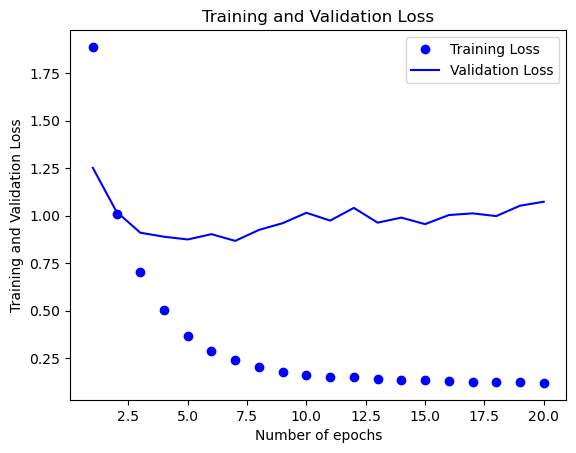

In [20]:
import matplotlib.pyplot as plt
epochs = range(1,len(history_dict["loss"])+1)

plt.plot(epochs,history_dict["loss"],"bo",label="Training Loss")
plt.plot(epochs,history_dict["val_loss"],"b",label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Training and Validation Loss")
plt.legend()
plt.show()


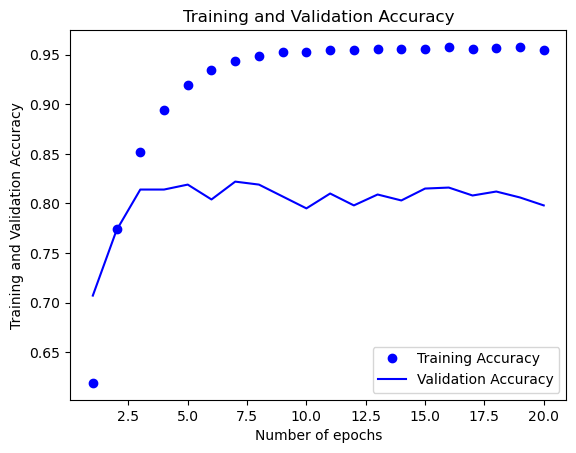

In [21]:
epochs = range(1,len(history_dict["accuracy"])+1)

plt.plot(epochs,history_dict["accuracy"],"bo",label="Training Accuracy")
plt.plot(epochs,history_dict["val_accuracy"],"b",label="Validation Accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Training and Validation Accuracy")
plt.legend()
plt.show()

In [22]:
# Model is starting to overfit after 9 epochs, so we set the final epochs to 9
model1 = Sequential([
    Dense(units=64,activation="relu"),
    Dense(units=64,activation="relu"),
    Dense(units=46,activation="softmax")
])

In [23]:
model1.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [24]:
model1.fit(X_train_final,y_train_final,epochs=9,batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/9
63/63 [==============================] - 1s 11ms/step - loss: 1.8961 - accuracy: 0.6097 - val_loss: 1.2870 - val_accuracy: 0.7080
Epoch 2/9
63/63 [==============================] - 1s 8ms/step - loss: 1.0172 - accuracy: 0.7767 - val_loss: 1.0250 - val_accuracy: 0.7830
Epoch 3/9
63/63 [==============================] - 1s 8ms/step - loss: 0.6959 - accuracy: 0.8477 - val_loss: 0.9510 - val_accuracy: 0.8070
Epoch 4/9
63/63 [==============================] - 1s 8ms/step - loss: 0.4833 - accuracy: 0.8976 - val_loss: 0.8639 - val_accuracy: 0.8170
Epoch 5/9
63/63 [==============================] - 1s 8ms/step - loss: 0.3516 - accuracy: 0.9261 - val_loss: 0.8941 - val_accuracy: 0.8220
Epoch 6/9
63/63 [==============================] - 1s 8ms/step - loss: 0.2695 - accuracy: 0.9402 - val_loss: 0.8674 - val_accuracy: 0.8290
Epoch 7/9
63/63 [==============================] - 1s 8ms/step - loss: 0.2219 - accuracy: 0.9465 - val_loss: 0.8975 - val_accuracy: 0.8210
Epoch 8/9
63/63 [=========

In [25]:
model1.evaluate(X_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0490 - accuracy: 0.7863


[1.0489929914474487, 0.7862867116928101]

In [34]:
# Predictions on new data
prediction = model1.predict(X_test[[10]]) # Single value prediction needs to be passed as a tensor(because our input is a 2D tensor)

1/1 [==============================] - 0s 30ms/step


In [35]:
np.argmax(prediction)

1

In [36]:
# Hence label 1 is the output label prediction for test case record number 10

In [38]:
# We could have used integer label encoding like below, but the loss function in that case should be sparse_categorical_crossentropy
#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

#model.compile(loss="sparse_categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])